In [1]:
# 1. 导入必要库（先运行 pip install 安装）
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE  # 处理数据不平衡


In [2]:
# 2. 数据加载与预览（文件路径需修改）
df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?')

In [3]:
# 3. 数据预处理（关键！）
# 3.1 选择重要特征（可根据实际数据调整）
features = [
    'Age', 
    'Number of sexual partners', 
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes',
    'STDs:HPV'
]
target = 'Dx:Cancer'

In [4]:
# 3.2 处理缺失值（简单方法：删除缺失值超过30%的行）
df_clean = df[features + [target]].dropna(thresh=len(features)*0.7, axis=0)


In [5]:
# 3.3 填充剩余缺失值
for col in features:
    if df_clean[col].dtype == 'object':  # 分类变量用众数
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    else:  # 数值变量用中位数
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_52656\3463559384.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [6]:
# 4. 特征工程
# 4.1 转换分类变量（例如：Smokes转为0/1）
df_clean['Smokes'] = df_clean['Smokes'].astype(int)
df_clean['STDs:HPV'] = df_clean['STDs:HPV'].astype(int)

In [7]:
# 4.2 划分数据集
X = df_clean[features]
y = df_clean[target]

In [8]:
# 5. 处理数据不平衡（SMOTE过采样）
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [9]:
# 6. 数据标准化（仅对数值型特征）
scaler = StandardScaler()
numeric_cols = ['Age', 'First sexual intercourse', 'Num of pregnancies']
X_res[numeric_cols] = scaler.fit_transform(X_res[numeric_cols])


In [10]:
# 7. 划分训练集/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

In [11]:
# 8. 模型训练（带简单调参）
# 8.1 逻辑回归
print("\n=== 逻辑回归 ===")
lr = LogisticRegression(max_iter=1000)
# 简单网格搜索
params_lr = {'C': [0.01, 0.1, 1]}
grid_lr = GridSearchCV(lr, params_lr, cv=3, scoring='f1')
grid_lr.fit(X_train, y_train)
y_pred = grid_lr.predict(X_test)
print(f"最佳参数: {grid_lr.best_params_}")
print(f"F1分数: {f1_score(y_test, y_pred):.2f}")
print("特征系数：")
for feat, coef in zip(features, grid_lr.best_estimator_.coef_[0]):
    print(f"{feat}: {coef:.3f}")


=== 逻辑回归 ===
最佳参数: {'C': 0.01}
F1分数: 0.75
特征系数：
Age: 0.559
Number of sexual partners: 0.171
First sexual intercourse: 0.360
Num of pregnancies: 0.069
Smokes: -0.329
STDs:HPV: 0.016


In [12]:
# 8.2 随机森林
print("\n=== 随机森林 ===")
rf = RandomForestClassifier()
# 简单参数设置
params_rf = {'n_estimators': [50, 100], 'max_depth': [3, 5]}
grid_rf = GridSearchCV(rf, params_rf, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print(f"最佳参数: {grid_rf.best_params_}")
print(f"F1分数: {f1_score(y_test, y_pred):.2f}")
print("特征重要性：")
for feat, imp in zip(features, grid_rf.best_estimator_.feature_importances_):
    print(f"{feat}: {imp:.3f}")



=== 随机森林 ===
最佳参数: {'max_depth': 5, 'n_estimators': 100}
F1分数: 0.91
特征重要性：
Age: 0.275
Number of sexual partners: 0.202
First sexual intercourse: 0.289
Num of pregnancies: 0.185
Smokes: 0.048
STDs:HPV: 0.001


In [13]:
# 9. 模型解释（绘制简单特征图）
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36923 (\N{CJK UNIFIED IDEOGRAPH-903B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36753 (\N{CJK UNIFIED IDEOGRAPH-8F91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site

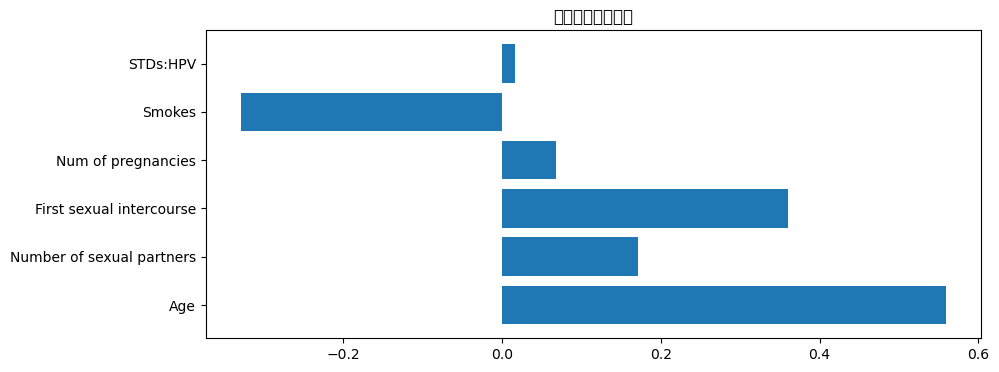

In [14]:
# 逻辑回归系数可视化
plt.figure(figsize=(10,4))
plt.barh(features, grid_lr.best_estimator_.coef_[0])
plt.title('逻辑回归特征系数')
plt.show()


e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site

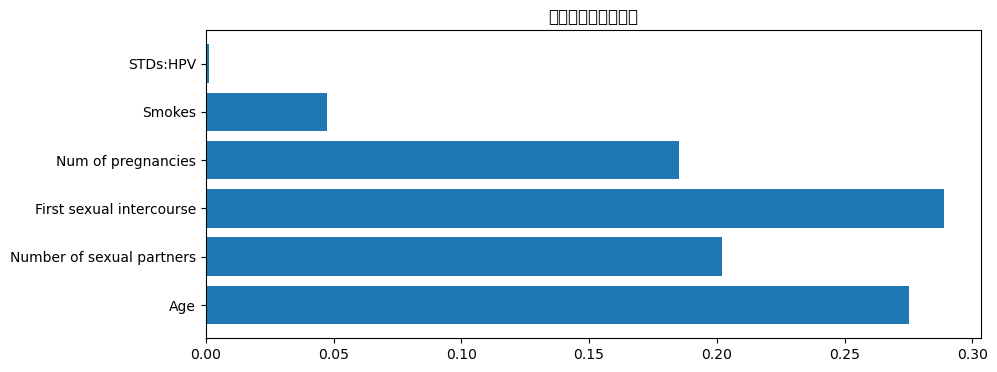

In [15]:
# 随机森林特征重要性可视化
plt.figure(figsize=(10,4))
plt.barh(features, grid_rf.best_estimator_.feature_importances_)
plt.title('随机森林特征重要性')
plt.show()

In [ ]:
# 导入库
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

In [ ]:
# 10.1 支持向量机（SVM）
print("\n=== 支持向量机 ===")
svm = SVC(probability=True)  # probability=True用于后续可输出概率
params_svm = {
    'C': [0.1, 1],          # 正则化参数
    'kernel': ['linear', 'rbf']  # 线性核和径向基核
}
grid_svm = GridSearchCV(svm, params_svm, cv=3, scoring='f1')
grid_svm.fit(X_train, y_train)
y_pred = grid_svm.predict(X_test)
print(f"最佳参数: {grid_svm.best_params_}")
print(f"F1分数: {f1_score(y_test, y_pred):.2f}")
print("特征重要性：")
for feat, imp in zip(features, grid_rf.best_estimator_.feature_importances_):
    print(f"{feat}: {imp:.3f}")


=== 支持向量机 ===
最佳参数: {'C': 1, 'kernel': 'rbf'}
F1分数: 0.83
特征重要性：
Age: 0.275
Number of sexual partners: 0.202
First sexual intercourse: 0.289
Num of pregnancies: 0.185
Smokes: 0.048
STDs:HPV: 0.001


In [37]:
# 可视化线性核的系数（仅当使用linear核时）
if grid_svm.best_params_['kernel'] == 'linear':
    plt.figure(figsize=(10,4))
    plt.barh(features, grid_svm.best_estimator_.coef_[0])
    plt.title('SVM线性核特征系数')
    plt.show()

In [34]:
# 10.3 LightGBM
print("\n=== LightGBM ===")
lgbm = lgb.LGBMClassifier()
params_lgbm = {
    'num_leaves': [15, 31],     # 叶子节点数
    'learning_rate': [0.05, 0.1]
}
grid_lgbm = GridSearchCV(lgbm, params_lgbm, cv=3, scoring='f1')
grid_lgbm.fit(X_train, y_train)
y_pred = grid_lgbm.predict(X_test)
print(f"最佳参数: {grid_lgbm.best_params_}")
print(f"F1分数: {f1_score(y_test, y_pred):.2f}")



=== LightGBM ===
[LightGBM] [Info] Number of positive: 264, number of negative: 269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495310 -> initscore=-0.018762
[LightGBM] [Info] Start training from score -0.018762
[LightGBM] [Info] Number of positive: 264, number of negative: 269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495310 -> initscore=-0.01876

In [35]:
print("特征重要性：")
for feat, imp in zip(features, grid_rf.best_estimator_.feature_importances_):
    print(f"{feat}: {imp:.3f}")

特征重要性：
Age: 0.275
Number of sexual partners: 0.202
First sexual intercourse: 0.289
Num of pregnancies: 0.185
Smokes: 0.048
STDs:HPV: 0.001


e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


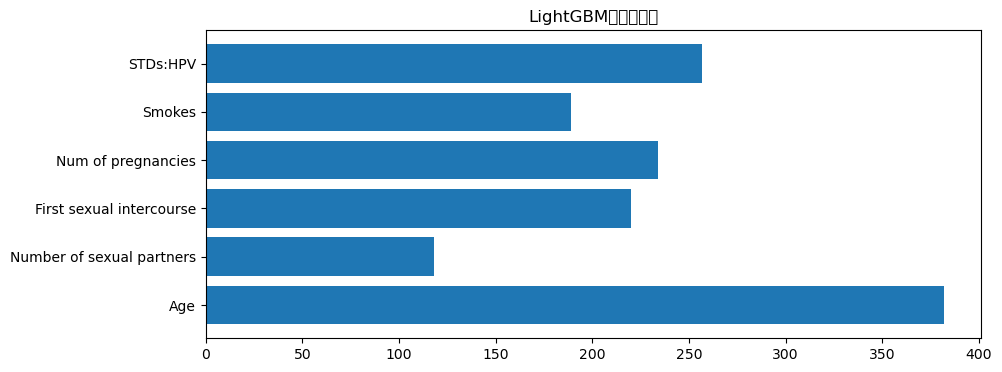

In [36]:
# 特征重要性可视化
plt.figure(figsize=(10,4))
plt.barh(features, grid_lgbm.best_estimator_.feature_importances_)
plt.title('LightGBM特征重要性')
plt.show()

In [20]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [21]:
# 模拟数据集（根据你的实际数据替换）
X, y = make_classification(n_samples=1000, n_features=6, n_informative=4, n_redundant=2, random_state=42)
feature_names = ["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "STDs:HPV"]


In [22]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# 训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [24]:
# 使用SHAP解释模型
explainer = shap.Explainer(rf_model, X_train, feature_names=feature_names)
shap_values = explainer(X_test)

<Figure size 640x480 with 0 Axes>

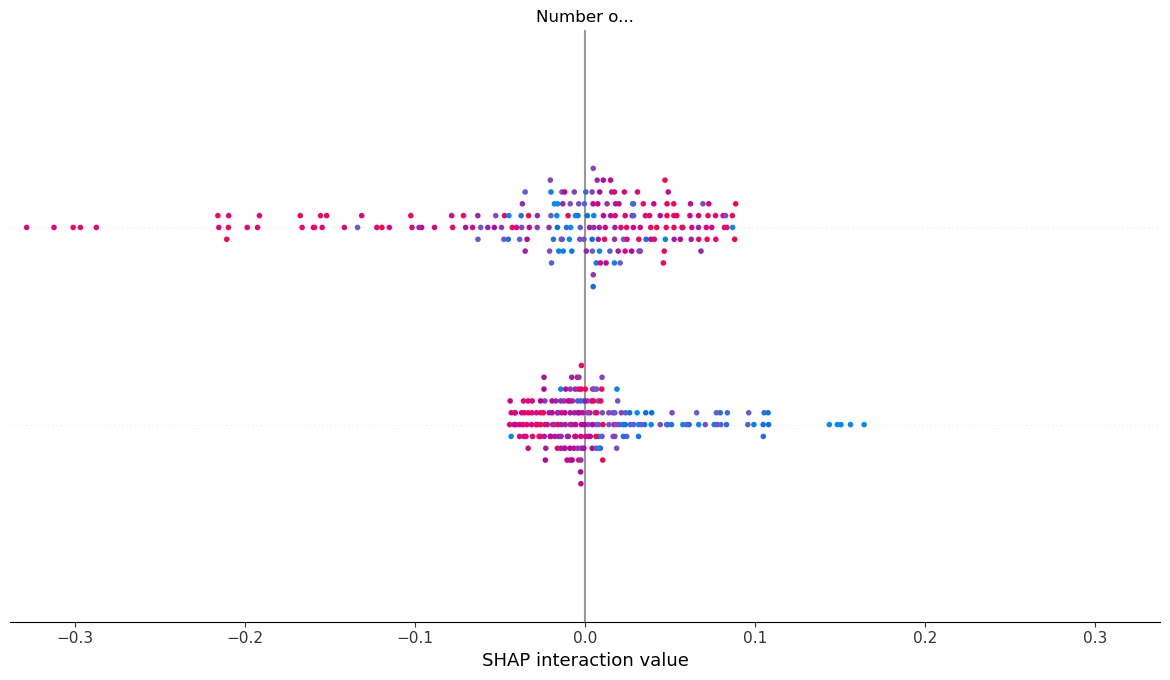

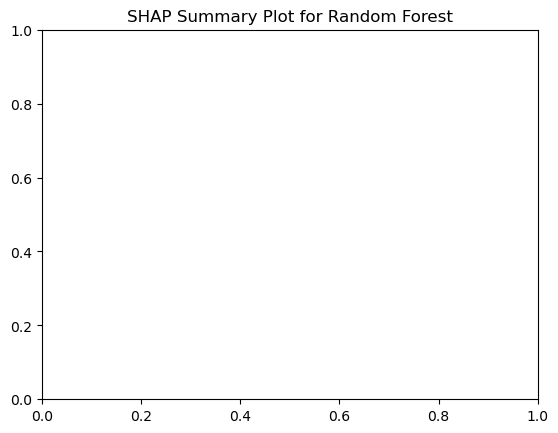

In [25]:
# 可视化SHAP值
# 1. SHAP值摘要图
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
plt.title("SHAP Summary Plot for Random Forest")
plt.show()

In [26]:
# 2. 特征重要性柱状图
shap.plots.bar(shap_values)
plt.title("Feature Importance by SHAP values")
plt.show()

IndexError: list index out of range